In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## 1. EDA 및 상관분석, 파생변수 선별

In [8]:
df = pd.read_csv('Data/Faulty_steel/faults.csv')

In [9]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


### (1) Target 추출 및 분포 확인

In [10]:
targets = (df.iloc[:,-7:]==1).idxmax(1)

In [11]:
df['target'] = targets

In [12]:
df.drop(['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

<AxesSubplot:xlabel='target', ylabel='count'>

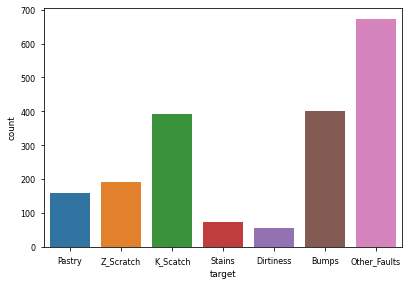

In [14]:
sns.countplot(x='target', data=df)

<AxesSubplot:ylabel='target'>

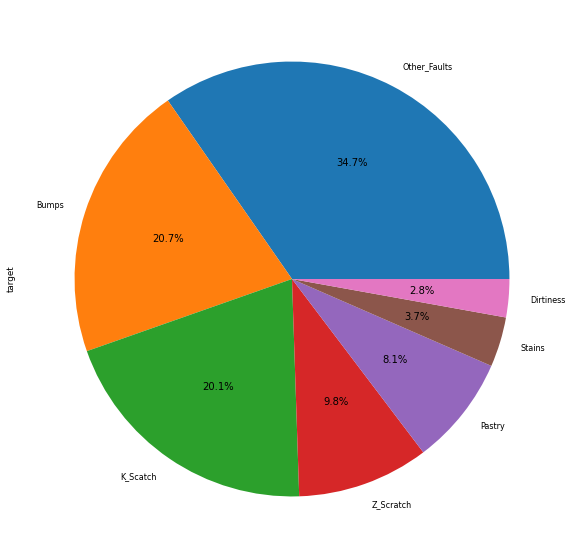

In [15]:
df.target.value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### (2) 결측치 확인

In [16]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
target                   0
dtype: int64

### (3) feature 데이터 탐색 및 상관관계 분석

In [17]:
train = df.iloc[:,:-1]
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


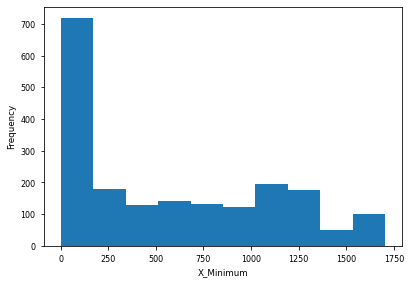

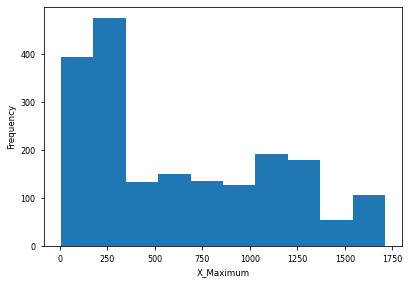

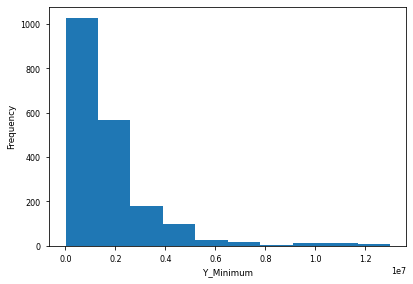

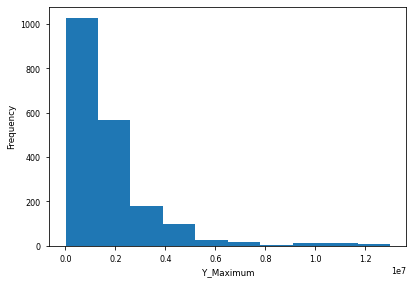

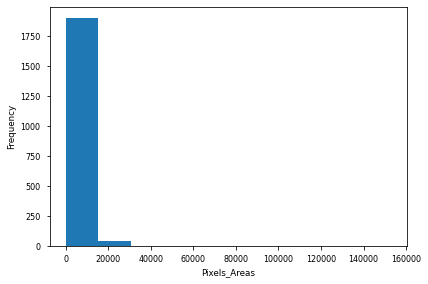

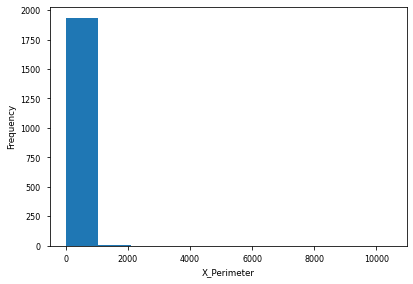

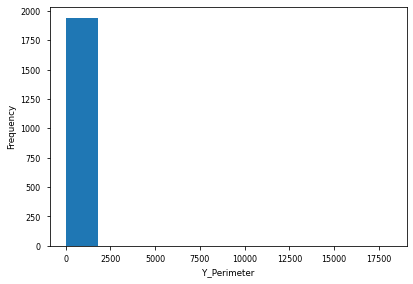

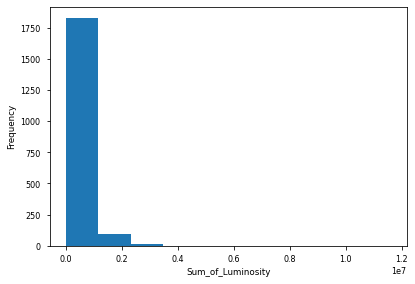

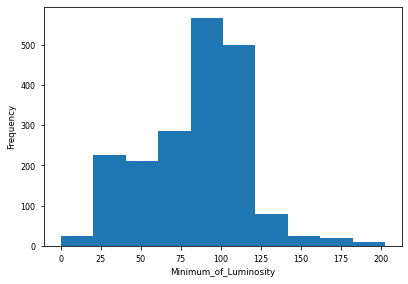

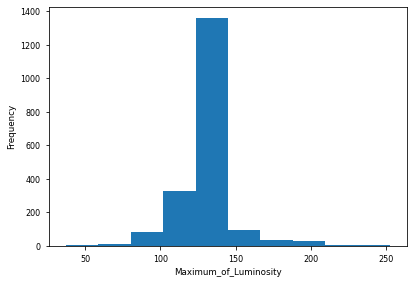

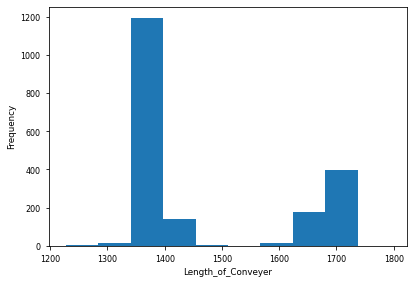

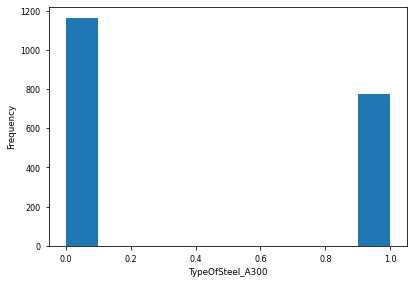

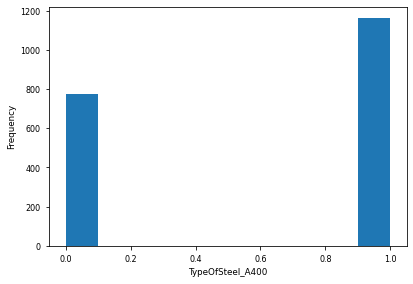

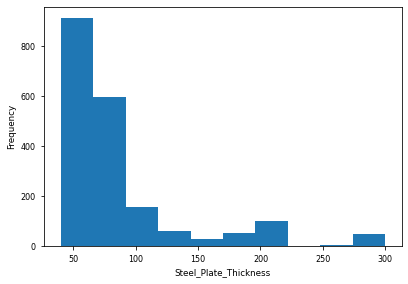

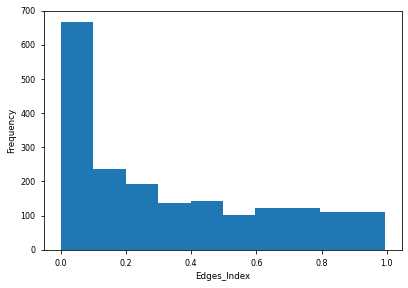

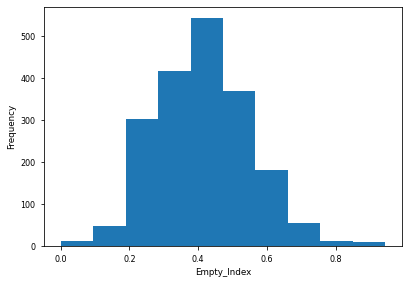

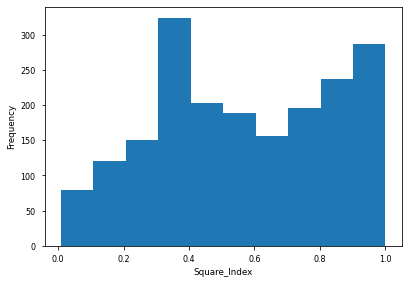

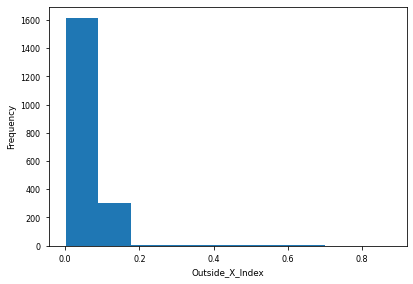

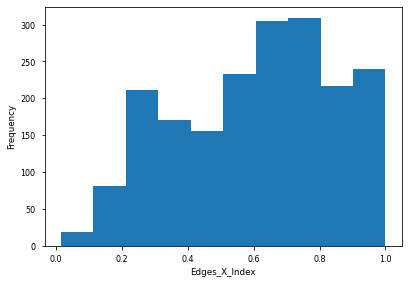

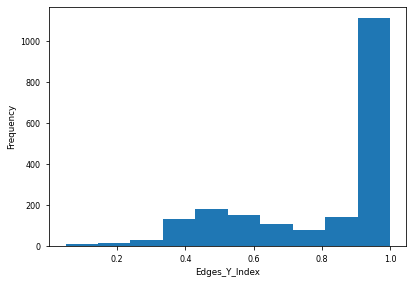

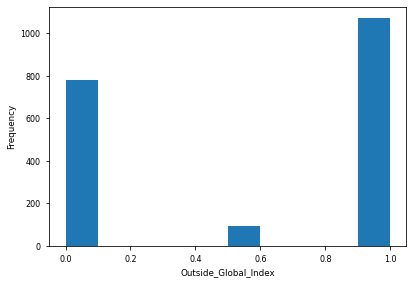

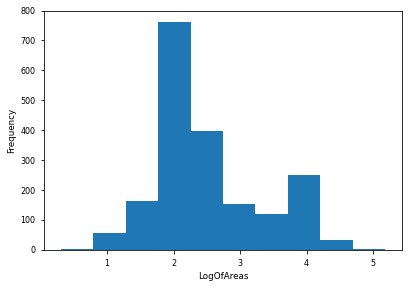

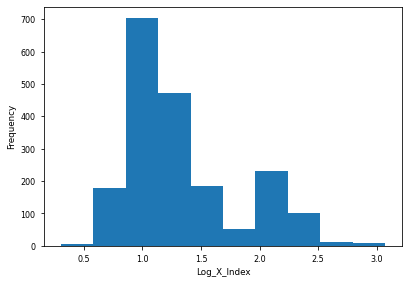

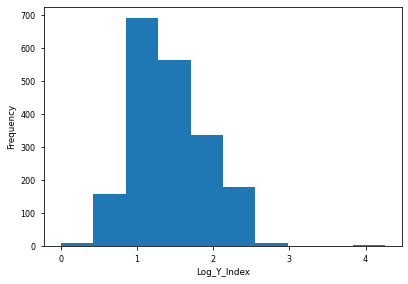

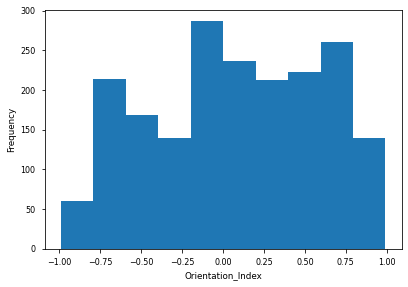

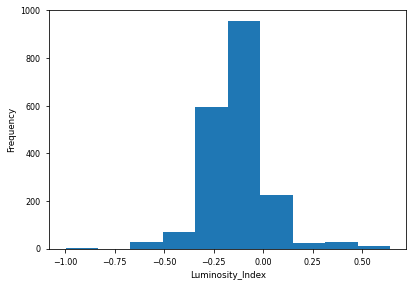

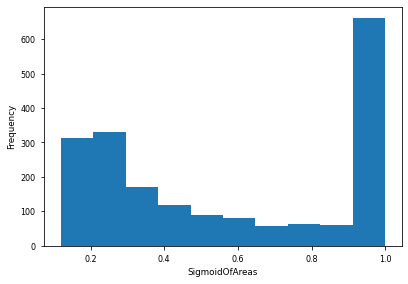

In [18]:
for col in train.columns:
    train[col].plot(kind='hist')
    plt.xlabel(col)
    plt.show()

- 범주형 변수로 판단됨 
: 'Outside_Global_index', 'TypeOfSteel_A400', 'TypeOfSteel_A300'

- 'X_Perimeter', 'Y_Perimeter' 0의 값에 치우침
  = 왜도, 첨도 확인 필요

In [19]:
from scipy.stats import norm, skew, kurtosis

skewness = pd.DataFrame({'skew' : train.skew()})
kurtosis = pd.DataFrame({'kurtosis' : train.kurtosis()})
skew_kurt = pd.concat([skewness, kurtosis], axis=1)

# skewness(비대칭도) > 0 이면 왼쪽 치우침, <0 이면 오른쪽 치우침, 0에 가까울 수록 대칭
# kurtosis(첨도) = 3 정도면 정규분포, >3 이면 데이터 분포가 한 곳에 밀집됨을 의미 
# 데이터 분포가 왜곡된 경우, log 변환 후 StandardScaler 스케일링 필요 

In [20]:
skew_kurt_col=skew_kurt[(np.abs(skew_kurt['skew']))>2|(skew_kurt['kurtosis']>3)].index

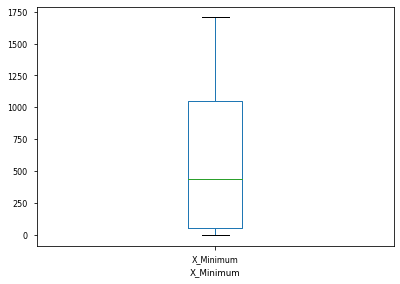

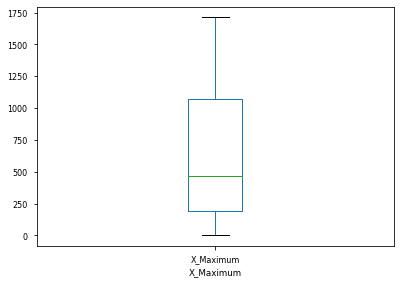

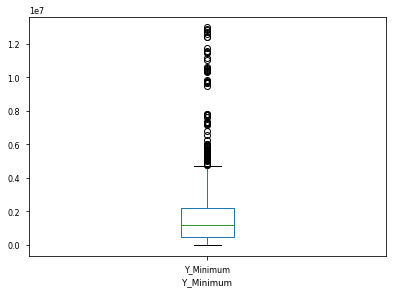

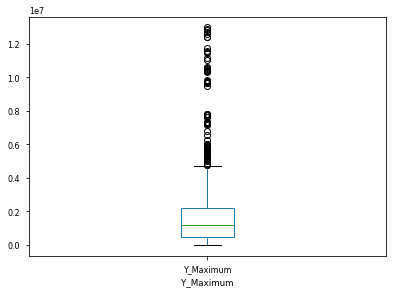

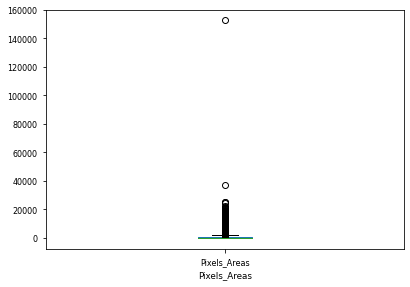

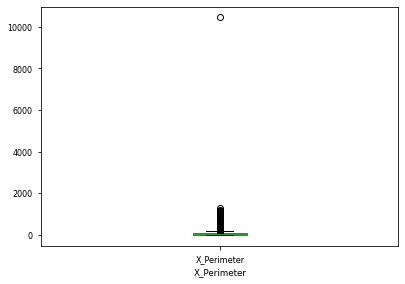

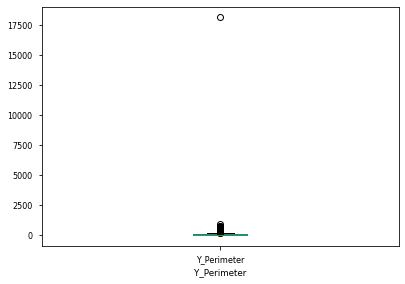

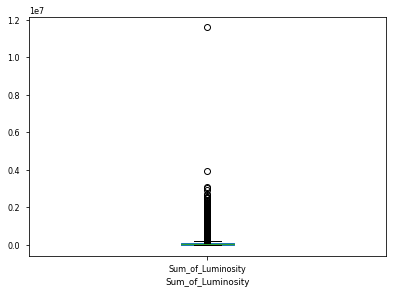

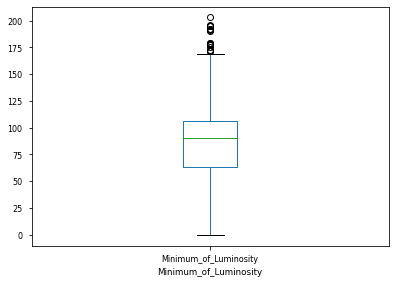

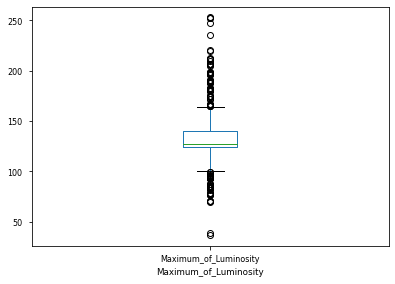

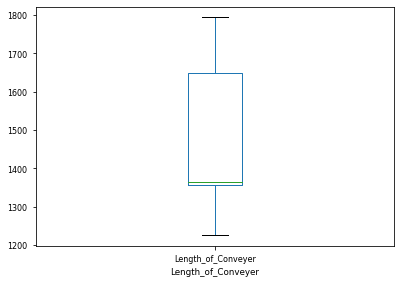

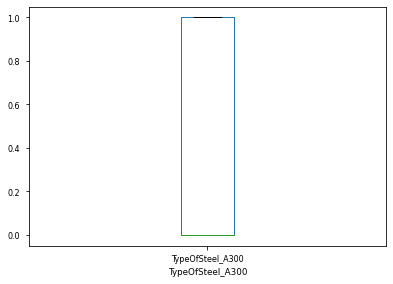

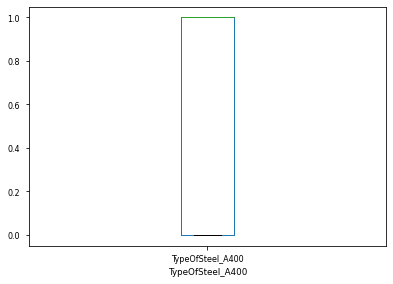

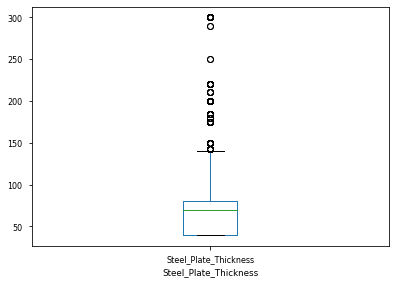

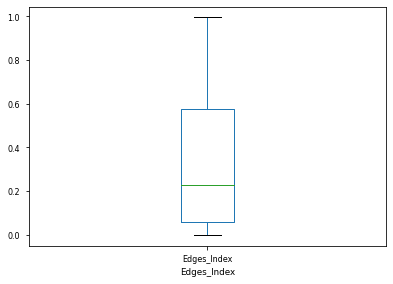

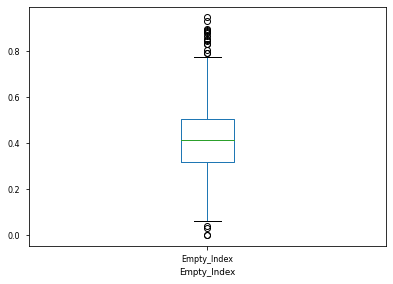

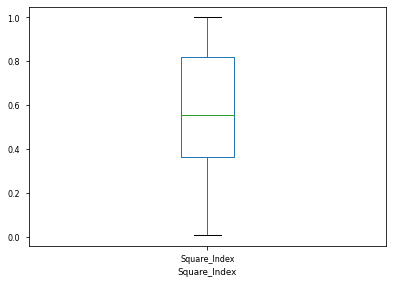

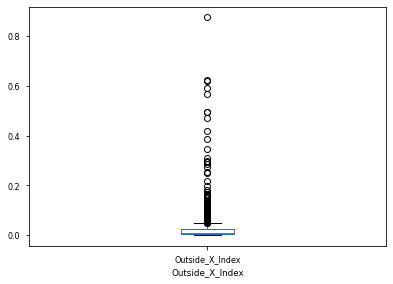

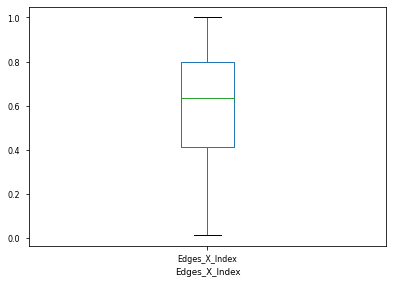

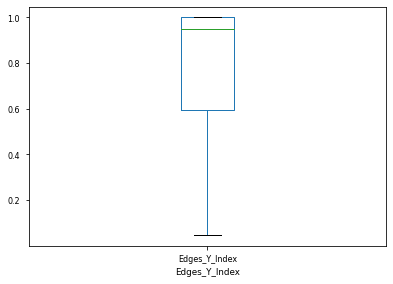

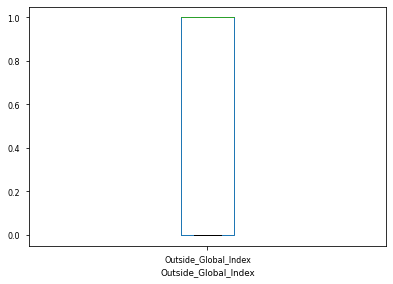

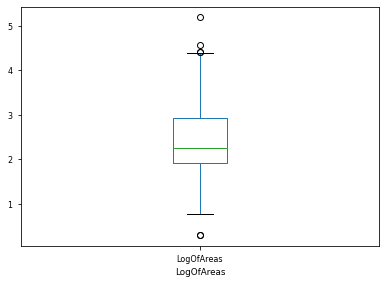

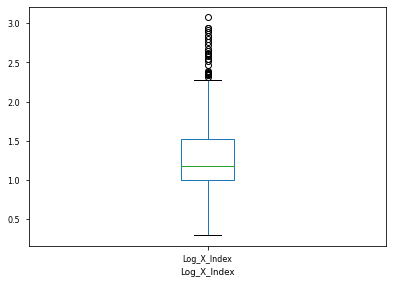

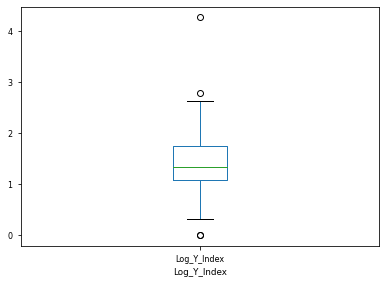

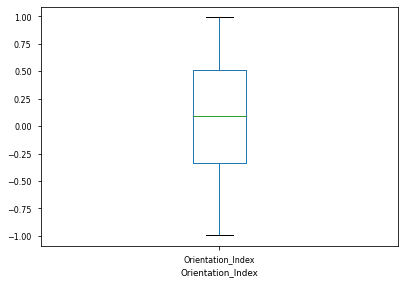

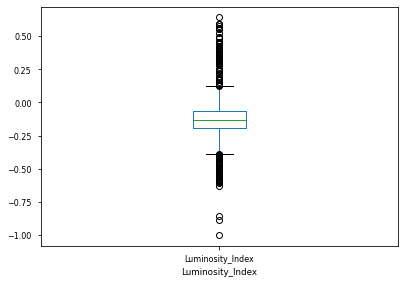

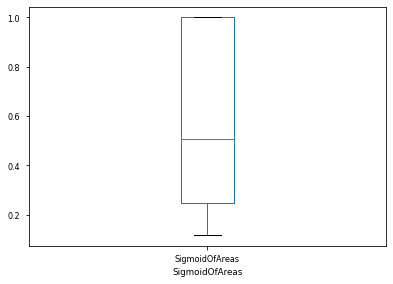

In [21]:
for col in train.columns:
    train[col].plot(kind='box')
    plt.xlabel(col)
    plt.show()

In [22]:
train.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


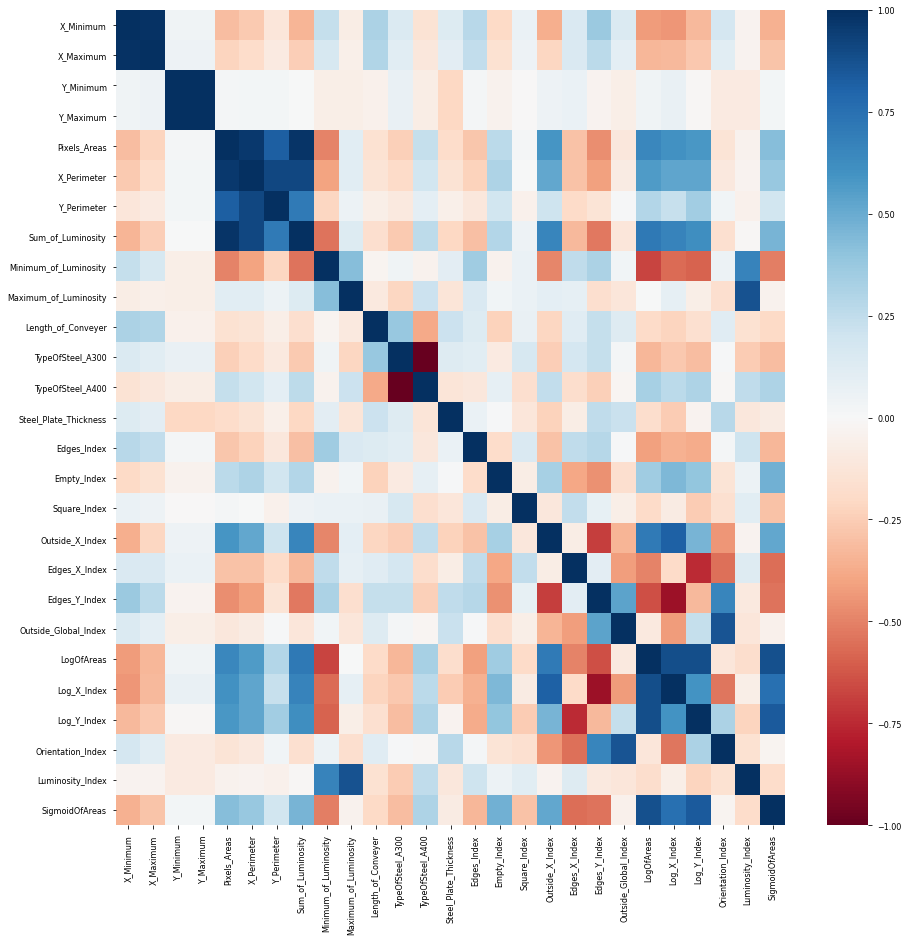

In [23]:
plt.figure(figsize=(15,15))

sns.heatmap(train.corr(), cmap='RdBu')


train.corr().style.background_gradient()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif = vif.set_index(train.columns)

In [19]:
vif[vif['VIF']>10]

,VIF
X_Minimum,4.207249e+04
X_Maximum,3.841371e+04
Y_Minimum,1.703244e+10
Y_Maximum,1.703264e+10
Pixels_Areas,4.907086e+02
X_Perimeter,1.687822e+02
Y_Perimeter,1.559205e+03
Sum_of_Luminosity,3.661924e+02
TypeOfSteel_A300,5.037452e+02
TypeOfSteel_A400,7.257152e+02


### (4) 분석에 필요한 파생변수 선별 

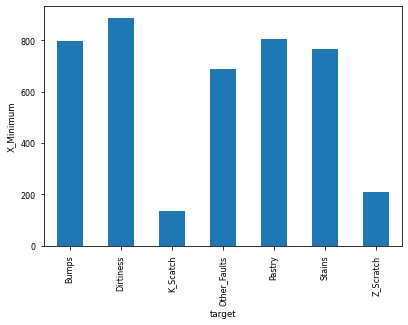

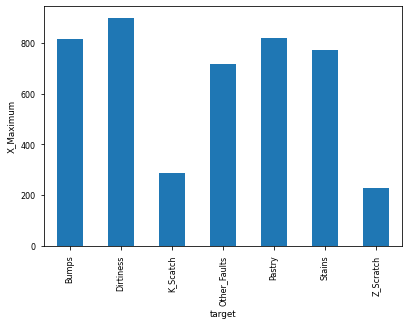

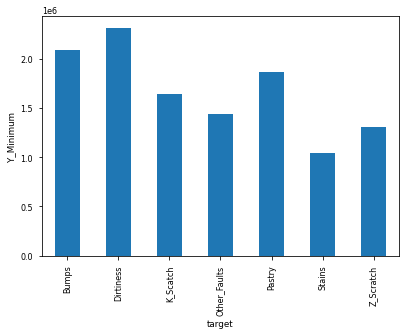

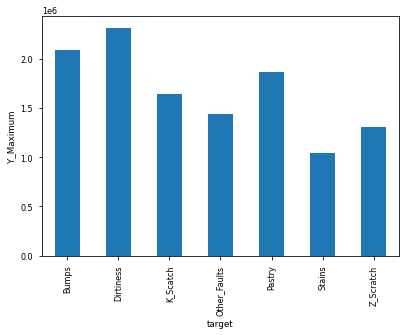

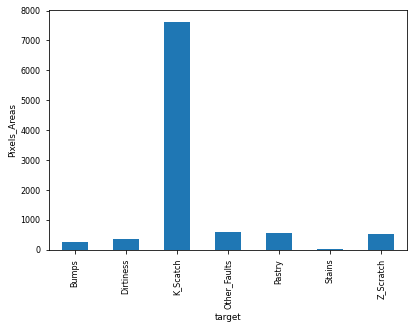

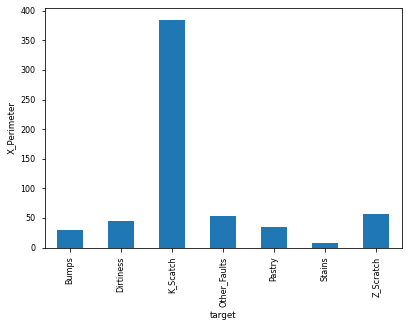

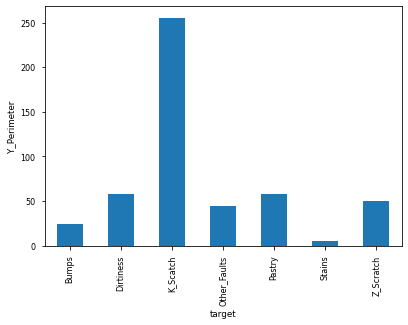

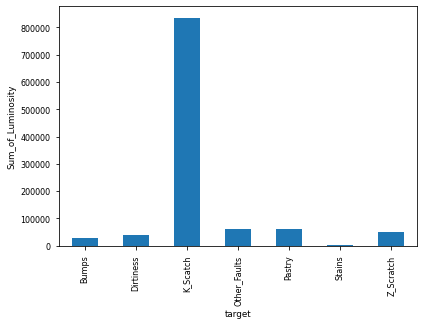

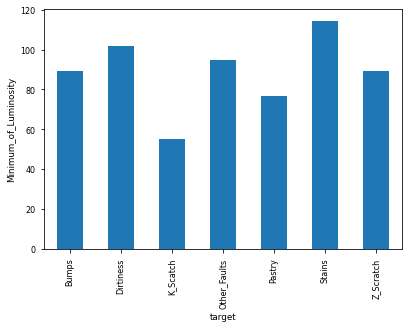

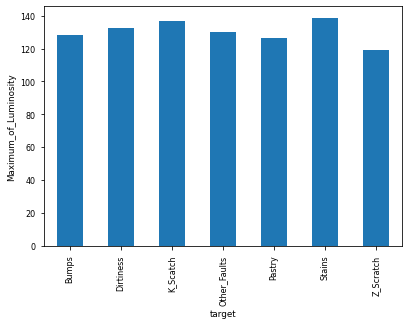

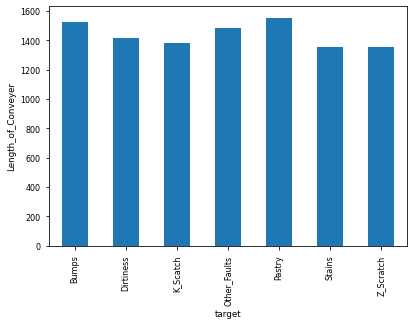

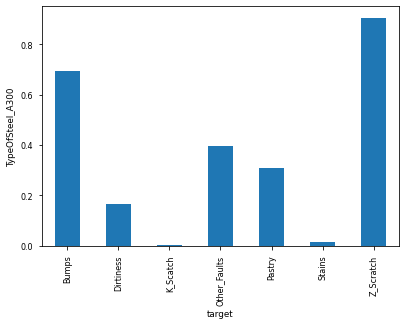

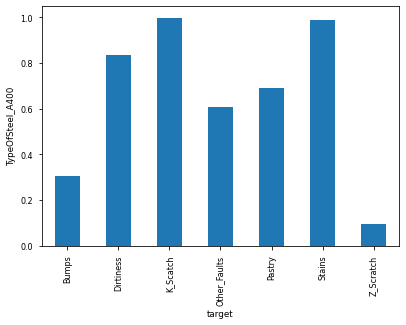

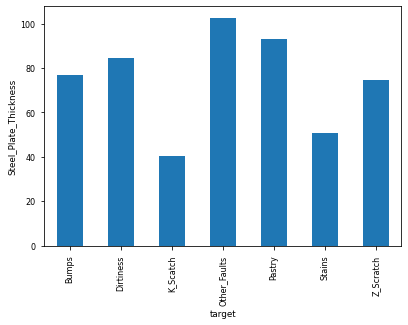

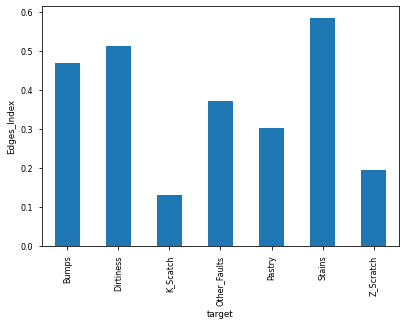

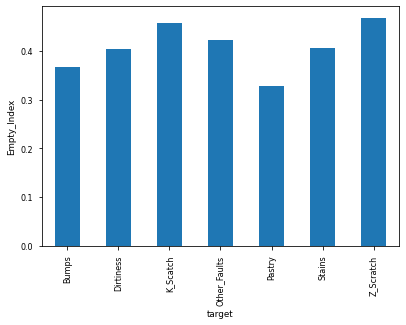

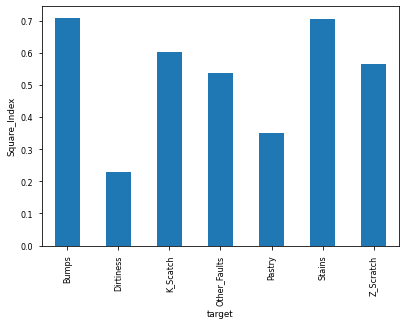

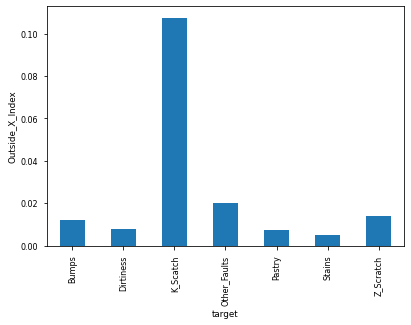

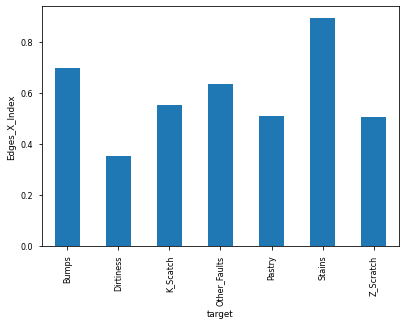

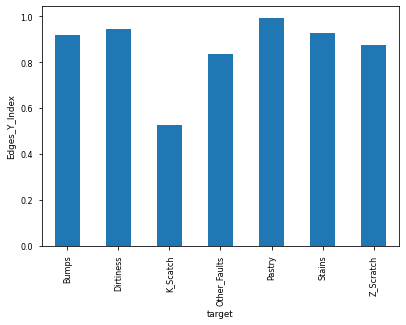

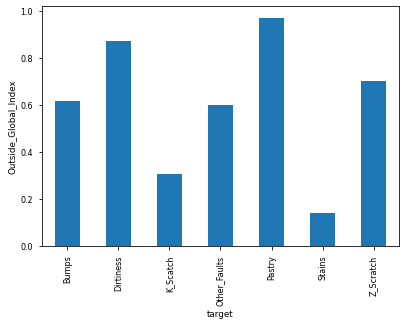

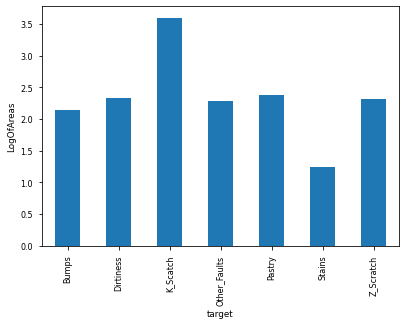

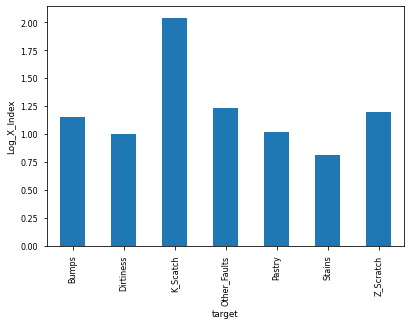

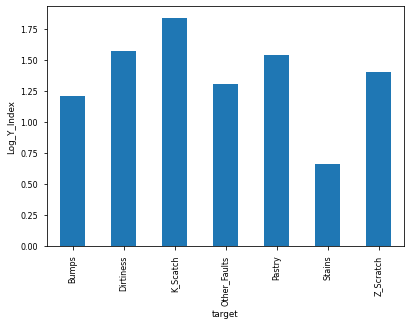

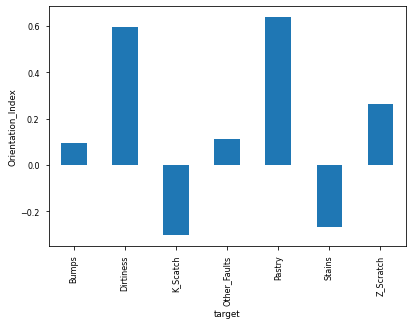

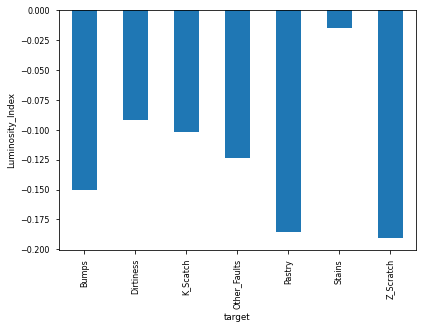

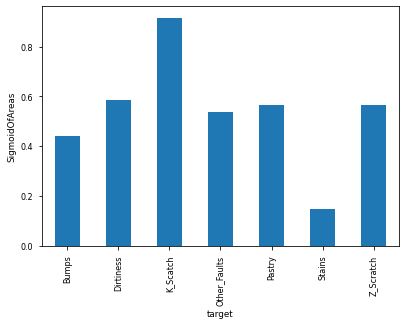

In [20]:
for col in train.columns:
    df.groupby('target').mean()[col].plot(kind='bar')
    plt.ylabel(col)
    plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(train)
X_train_scaled=scaler.transform(train)

array([3.07529519e-01, 1.26670017e-01, 1.00143613e-01, 8.28857864e-02,
       7.30183528e-02, 6.01360914e-02, 5.10362178e-02, 3.70263921e-02,
       3.41381902e-02, 2.89227148e-02, 2.64995558e-02, 2.02676107e-02,
       1.45610929e-02, 1.09199663e-02, 8.86192682e-03, 6.99136196e-03,
       3.70688396e-03, 2.19672178e-03, 2.05688707e-03, 1.65948681e-03,
       4.42939895e-04, 2.59478900e-04, 5.05224612e-05, 1.82053560e-05,
       4.64956860e-07, 1.08724349e-12, 1.26216447e-33])

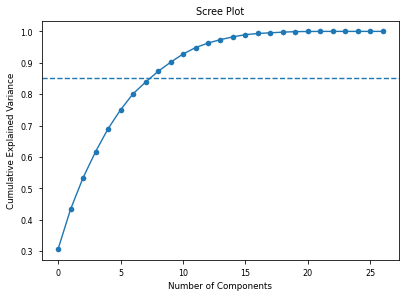

In [81]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
pca_score = pca.transform(X_train_scaled)

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.axhline(y=0.85, linestyle='--')



In [23]:
pd.DataFrame((pca.explained_variance_ratio_)*100, columns=['설명력(%)'])

,설명력(%)
0,3.075295e+01
1,1.266700e+01
2,1.001436e+01
3,8.288579e+00
4,7.301835e+00
5,6.013609e+00
6,5.103622e+00
7,3.702639e+00
8,3.413819e+00
9,2.892271e+00


In [24]:
pca_score=pd.DataFrame(pca_score)

In [25]:
pca_df = pd.concat([pca_score.iloc[:, :6], df['target']], axis=1)

pca_df.columns =['PC1','PC2','PC3','PC4','PC5','PC6','target']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,target
0,-0.977232,3.020683,-0.688722,-0.903119,-1.538906,1.584716,Pastry
1,-2.256678,1.823137,-0.878726,0.569817,0.337142,0.696817,Pastry
2,-2.983902,1.077988,-0.414668,1.043932,-0.287253,0.254074,Pastry
3,-1.482488,2.429416,2.352678,-0.320995,-0.236069,-1.037946,Pastry
4,1.302747,3.967834,1.560471,-0.588543,0.446530,-2.276204,Pastry


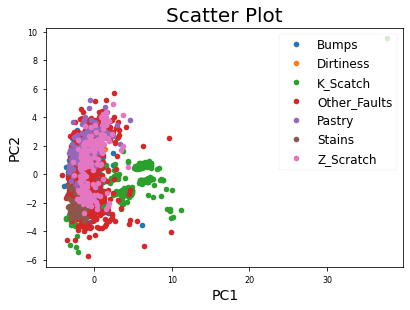

In [72]:
groups = pca_df.groupby('target')



fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.PC1, 

            group.PC2, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper right') # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('PC1', fontsize=14)

plt.ylabel('PC2', fontsize=14)

plt.show()
        

## 2-1. 데이터 훈련용, 테스트용, 평가용으로 나누고 시각화

In [47]:
X = pca_df.iloc[:,:-1]
y = pca_df.target

print(X.shape)
print(y.shape)

(1941, 6)
(1941,)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


([<matplotlib.patches.Wedge at 0x229b1e38248>,
 [Text(-0.3389024914655798, 1.0464918065988011, 'train'),
  Text(-0.3422885514562763, -1.0453891847259393, 'valid'),
  Text(0.889080642660139, -0.6477156867384288, 'test')],
 [Text(-0.1848559044357708, 0.5708137126902552, '60.0%'),
  Text(-0.18670284624887798, -0.570212282577785, '20.0%'),
  Text(0.4849530778146212, -0.35329946549368846, '20.0%')])

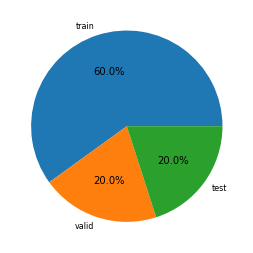

In [49]:
shape=[]
shape.append(X_train.shape[0])
shape.append(X_valid.shape[0])
shape.append(X_test.shape[0])

plt.pie(shape, autopct='%1.1f%%', labels=['train','valid','test'])

Other_Faults    36.597938
Bumps           21.134021
K_Scatch        18.814433
Pastry           9.793814
Z_Scratch        7.731959
Stains           3.092784
Dirtiness        2.835052
Name: target, dtype: float64


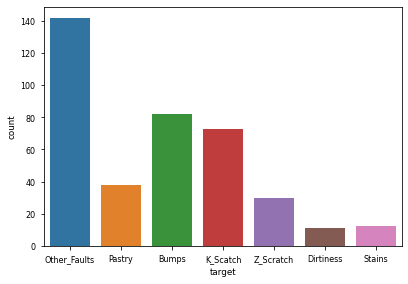

In [50]:
sns.countplot(y_valid)
print(y_valid.value_counts()/len(y_valid)*100)

Other_Faults    36.597938
Bumps           21.134021
K_Scatch        18.814433
Pastry           9.793814
Z_Scratch        7.731959
Stains           3.092784
Dirtiness        2.835052
Name: target, dtype: float64


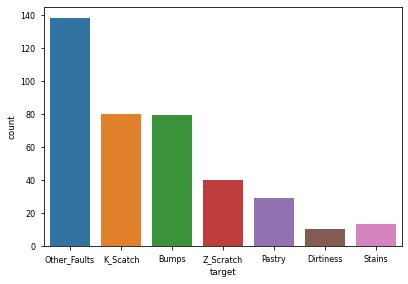

In [51]:
sns.countplot(y_test)
print(y_valid.value_counts()/len(y_valid)*100)

Other_Faults    36.597938
Bumps           21.134021
K_Scatch        18.814433
Pastry           9.793814
Z_Scratch        7.731959
Stains           3.092784
Dirtiness        2.835052
Name: target, dtype: float64


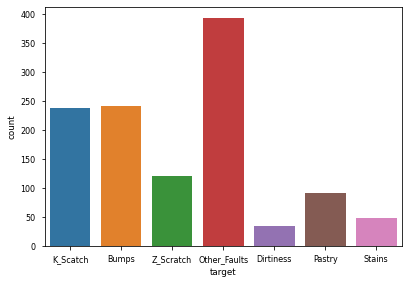

In [52]:
sns.countplot(y_train)
print(y_valid.value_counts()/len(y_valid)*100)

In [53]:
# 종속변수가 불균등할 경우 sampling 필요 

'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())
'''


"\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=0)\nX_train_over,y_train_over = smote.fit_sample(X_train,y_train)\nprint('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)\nprint('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)\nprint('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())\n"

## 2-2. 목표 변수를 이항 변수로 바꾸고 로지스틱 회귀 분석 및 confusionMatrix, cut off value 구하기

In [54]:
encode_y_train = pd.get_dummies(y_train)
encode_y_valid = pd.get_dummies(y_valid)
encode_y_test = pd.get_dummies(y_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc


lr = LogisticRegression(random_state=0)

for i in range(encode_y_train.shape[1]):
    lr_model = lr.fit(X_train, encode_y_train.iloc[:,i])
    predicted_valid=lr_model.predict(X_valid)
    matrix = confusion_matrix(encode_y_valid.iloc[:,i], predicted_valid)
    print('[',encode_y_test.columns[i],']')
    print('')
    print(matrix)
    
    
    fpr, tpr, thresholds = roc_curve(encode_y_valid.iloc[:,i], lr_model.predict_proba(scaled_X_valid)[:,1])
    optimal_idx=np.argmax(tpr-fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('* auc:', roc_auc_score(encode_y_valid.iloc[:,i], lr_model.predict_proba(scaled_X_valid)[:,1]))
    print('* cut-off value:', optimal_threshold)
    print('')
    

[ Bumps ]

[[289  17]
 [ 69  13]]
* auc: 0.7888171528774112
* cut-off value: 0.14746708216873178

[ Dirtiness ]

[[377   0]
 [ 11   0]]
* auc: 0.79382686279238
* cut-off value: 0.05411267385535674

[ K_Scatch ]

[[307   8]
 [  8  65]]
* auc: 0.9731680800173951
* cut-off value: 0.12206762599332095

[ Other_Faults ]

[[220  26]
 [114  28]]
* auc: 0.6293083705484942
* cut-off value: 0.34621891751597

[ Pastry ]

[[349   1]
 [ 38   0]]
* auc: 0.9024812030075188
* cut-off value: 0.038724582345419485

[ Stains ]

[[374   2]
 [  6   6]]
* auc: 0.8701241134751774
* cut-off value: 0.000997875520505331

[ Z_Scratch ]

[[340  18]
 [ 13  17]]
* auc: 0.8891992551210428
* cut-off value: 0.16824763467766377



class 0 cut-off value: 0.25087840153723745
class 1 cut-off value: 0.7283604754418004
class 2 cut-off value: 0.516777689448336
class 3 cut-off value: 0.3726858006199759
class 4 cut-off value: 0.4334882673776261
class 5 cut-off value: 0.969329172718766


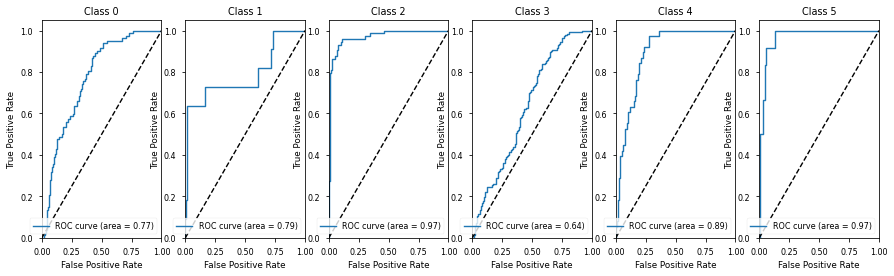

In [57]:
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression()
clf = OneVsRestClassifier(model)
clf.fit(scaled_X_train, encode_y_train)

predicted_valid=clf.predict(X_valid)
predicted_proba=clf.predict_proba(X_valid)
#matrix = confusion_matrix(encode_y_valid, predicted_valid)
#precision = precision_score(encode_y_valid, predicted_valid, average='weighted')
#print(matrix)
#print(precision)
    
    
# ROC & AUC
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
optimal_idx = dict()
optimal_threshold = dict()


for i in range(6):
    predicted_proba[:,i]
    fpr[i], tpr[i], thresholds[i] = roc_curve(encode_y_valid.iloc[:,i], predicted_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    optimal_idx[i]=np.argmax(tpr[i]-fpr[i])
    optimal_threshold[i] = thresholds[i][optimal_idx[i]]
    print('class',i,'cut-off value:',optimal_threshold[i])
    
    
plt.figure(figsize=(15, 4))
for idx, i in enumerate(range(6)):
    plt.subplot(161+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()



## 2-3. SVM을 포함하여 3개의 다항분류 모형 선정 및 평가 

In [58]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

label_y_train = le.fit_transform(y_train)
label_y_valid = le.fit_transform(y_valid)
label_y_test = le.fit_transform(y_test)

In [62]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

svc_params = {'C': [0.5, 1], 'kernel': ['rbf', 'linear']}
rf_params = {'n_estimators':[100,1000]}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1))}

classifiers = {
    "RandomForest Classifier": [RandomForestClassifier(), rf_params],
    "Support Vector Classifier": [SVC(), svc_params],
    "DecisionTreeClassifier": [DecisionTreeClassifier(), tree_params]
}

In [60]:
def grid(X_train, y_train, X_test, y_test, model ,params, label):
    
    grid = GridSearchCV(model, params, refit=True, cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    
    
    print('best parameter:', grid.best_params_)
    print('best score:', grid.best_score_)
    
    pred=grid.predict(X_test)
    precision = precision_score(y_test, pred, average='weighted')
    print('precision:', precision)
    recall = recall_score(y_test, pred, average='weighted')
    print('sensitivity:', recall)
    
    confusion = confusion_matrix(y_test,pred)
    matrix = pd.DataFrame(confusion, index=encode_y_train.columns, columns=encode_y_train.columns)
    
    sns.heatmap(matrix, annot=True, cmap='Blues')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    return 
    

Valid
[ RandomForest Classifier ]
best parameter: {'n_estimators': 100}
best score: 0.692432877039453
precision: 0.7010722253838909
sensitivity: 0.6881443298969072


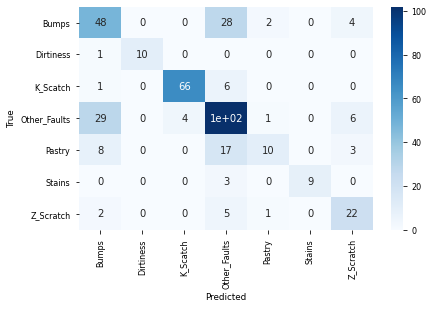


Test
[ RandomForest Classifier ]
best parameter: {'n_estimators': 1000}
best score: 0.6867528286691001
precision: 0.7279932330331466
sensitivity: 0.7275064267352185


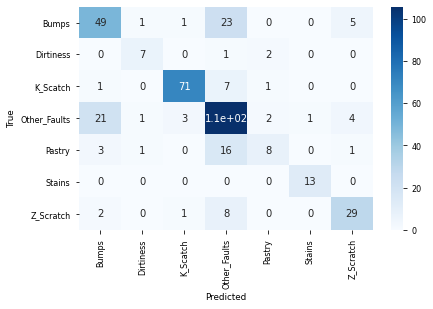


Valid
[ Support Vector Classifier ]
best parameter: {'C': 1, 'kernel': 'rbf'}
best score: 0.5934134984965985
precision: 0.721617702705024
sensitivity: 0.6701030927835051


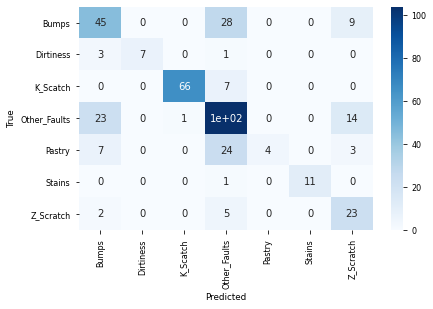


Test
[ Support Vector Classifier ]
best parameter: {'C': 1, 'kernel': 'rbf'}
best score: 0.5934134984965985
precision: 0.7298544130616815
sensitivity: 0.7197943444730077


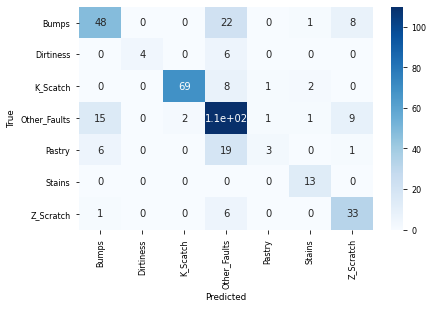


Valid
[ DecisionTreeClassifier ]
best parameter: {'criterion': 'entropy', 'max_depth': 3}
best score: 0.31671307671999693
precision: 0.4503876166415387
sensitivity: 0.5180412371134021


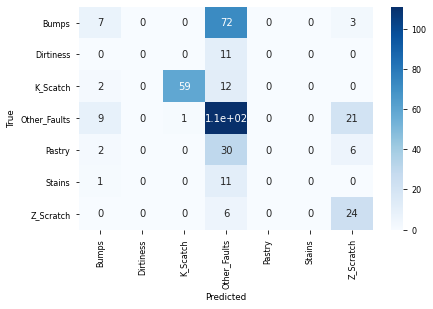


Test
[ DecisionTreeClassifier ]
best parameter: {'criterion': 'entropy', 'max_depth': 3}
best score: 0.31671307671999693
precision: 0.5054504688220948
sensitivity: 0.5604113110539846


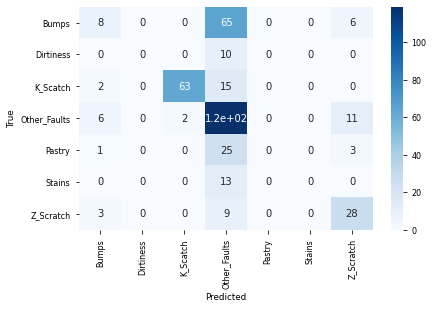

In [64]:
for key, classifier in classifiers.items():
    print('Valid')
    print('[',key,']')
    grid(X_train, label_y_train, X_valid, label_y_valid, classifier[0], classifier[1], key)
    print('')
    
    print('Test')
    print('[',key,']')
    grid(X_train, label_y_train, X_test, label_y_test, classifier[0], classifier[1], key)
    print('')
    

## 2-4. 가장 적합한 모형을 활용하여 군집분석 실시 후  F1 값 구하시오

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train)
kmeans.labels_

array([3, 6, 5, ..., 1, 3, 4])